In [4]:
import pyam
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
results_path = '../../../data/TOD/model_results/to_share/model_results_to_share_Outlooks.xlsx'

# Land Cover Changes

In [6]:
df_land = pd.read_excel(results_path)
df_land.rename(columns={'topic':'model'}, inplace=True)
df_land = pyam.IamDataFrame(df_land)
df_land = df_land.filter(variable=[
    'Land Cover|Cropland',
    'Land Cover|Forest and Other Natural Land',
    'Land Cover|Other',
    'Land Cover|Pasture'],
    region='World')
df_land.timeseries()

2010  \
model scenario region variable                                 unit                 
Land  LIFE-TP  World  Land Cover|Cropland                      million ha  1530.0   
                      Land Cover|Forest and Other Natural Land million ha  8210.0   
                      Land Cover|Other                         million ha    69.6   
                      Land Cover|Pasture                       million ha  3160.0   
      REF      World  Land Cover|Cropland                      million ha     NaN   
                      Land Cover|Forest and Other Natural Land million ha     NaN   
                      Land Cover|Other                         million ha     NaN   
                      Land Cover|Pasture                       million ha     NaN   
      TECH-TP  World  Land Cover|Cropland                      million ha  1530.0   
                      Land Cover|Forest and Other Natural Land million ha  8210.0   
                      Land Cover|Other                         million ha    69.6   
                      Land Cover|Pasture                       million ha  3160.0   

                                                                             2020  \
model scenario region variable                                 unit                 
Land  LIFE-TP  World  Land Cover|Cropland                      million ha  1590.0   
                      Land Cover|Forest and Other Natural Land million ha  8140.0   
                      Land Cover|Other                         million ha    85.9   
                      Land Cover|Pasture                       million ha  3150.0   
      REF      World  Land Cover|Cropland                      million ha  1590.0   
                      Land Cover|Forest and Other Natural Land million ha  8140.0   
                      Land Cover|Other                         million ha    85.9   
                      Land Cover|Pasture                       million ha  3150.0   
      TECH-TP  World  Land Cover|Cropland                      million ha  1590.0   
                      Land Cover|Forest and Other Natural Land million ha  8140.0   
                      Land Cover|Other                         million ha    85.9   
                      Land Cover|Pasture                       million ha  3150.0   

                                                                             2030  \
model scenario region variable                                 unit                 
Land  LIFE-TP  World  Land Cover|Cropland                      million ha  1660.0   
                      Land Cover|Forest and Other Natural Land million ha  8320.0   
                      Land Cover|Other                         million ha    91.7   
                      Land Cover|Pasture                       million ha  2890.0   
      REF      World  Land Cover|Cropland                      million ha  1640.0   
                      Land Cover|Forest and Other Natural Land million ha  8110.0   
                      Land Cover|Other                         million ha    99.2   
                      Land Cover|Pasture                       million ha  3110.0   
      TECH-TP  World  Land Cover|Cropland                      million ha  1650.0   
                      Land Cover|Forest and Other Natural Land million ha  8210.0   
                      Land Cover|Other                         million ha    88.3   
                      Land Cover|Pasture                       million ha  3020.0   

                                                                             2040  \
model scenario region variable                                 unit                 
Land  LIFE-TP  World  Land Cover|Cropland                      million ha  1660.0   
                      Land Cover|Forest and Other Natural Land million ha  8560.0   
                      Land Cover|Other                         million ha   105.0   
                      Land Cover|Pasture                       million ha  2650

In [7]:
df_land_data = df_land.data
df_land_data = df_land_data[df_land_data['year'].isin([2020, 2030, 2050])]

df_land_data = df_land_data.reset_index(drop=True)
df_land_data['change'] = df_land_data['value'].diff()
df_land_data = df_land_data[df_land_data['year'].isin([2030, 2050])] # , 2050
# df_land_data = df_land_data[df_land_data['scenario'].isin(['REF'])]]
df_land_data = df_land_data.sort_values(['year', 'change'])
df_land_data['scenario'] = df_land_data['scenario'].replace({
    'REF':'Current Trends',
    'LIFE-TP':'Behaviour-focused',
    'TECH-TP':'Technology-focused',
})
df_land_data

,model,scenario,region,variable,unit,year,value,change
10,Land,Behaviour-focused,World,Land Cover|Pasture,million ha,2030,2890.0,-260.0
34,Land,Technology-focused,World,Land Cover|Pasture,million ha,2030,3020.0,-130.0
22,Land,Current Trends,World,Land Cover|Pasture,million ha,2030,3110.0,-40.0
16,Land,Current Trends,World,Land Cover|Forest and Other Natural Land,million ha,2030,8110.0,-30.0
31,Land,Technology-focused,World,Land Cover|Other,million ha,2030,88.3,2.4
7,Land,Behaviour-focused,World,Land Cover|Other,million ha,2030,91.7,5.8
19,Land,Current Trends,World,Land Cover|Other,million ha,2030,99.2,13.3
13,Land,Current Trends,World,Land Cover|Cropland,million ha,2030,1640.0,50.0
25,Land,Technology-focused,World,Land Cover|Cropland,million ha,2030,1650.0,60.0
1,Land,Behaviour-focused,World,Land Cover|Cropland,million ha,2030,1660.0,70.0


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_5728\118597829.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Current Trends', 'Behaviour-focused', 'Technology-focused'], rotation=45)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_5728\118597829.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Current Trends', 'Behaviour-focused', 'Technology-focused'], rotation=45)


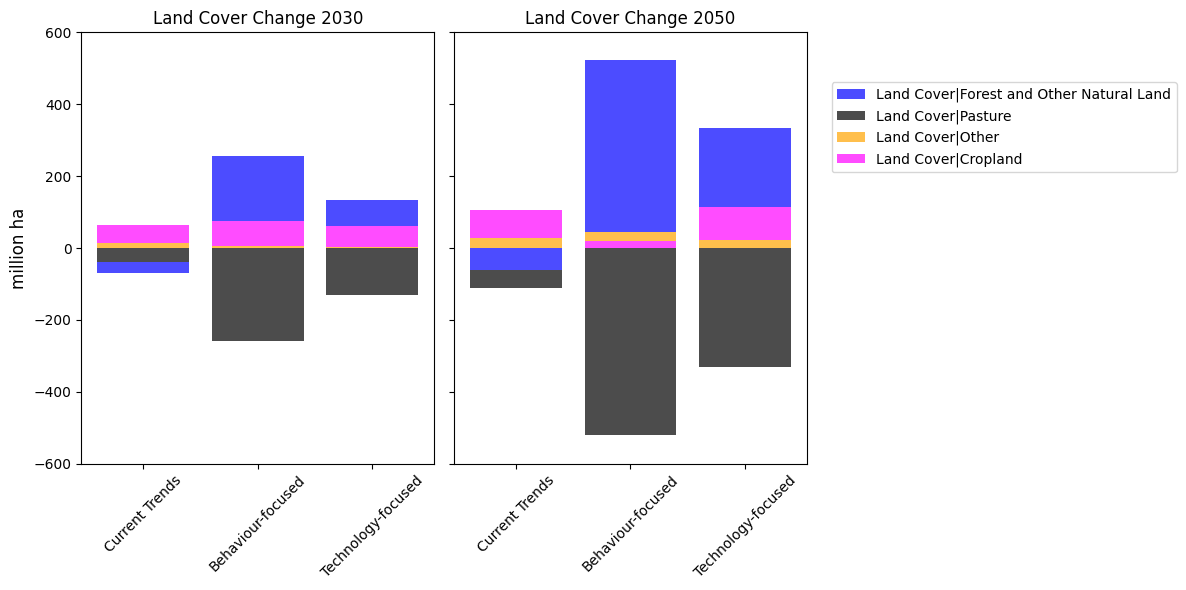

In [11]:
# Set the number of columns for subplots
num_cols = 2
# Calculate the number of rows needed
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
# Flatten the axes array for easy iteration
axes = axes.flatten()
export_data = []
for idx, year in enumerate(df_land_data['year'].unique()):
    df_land_data_temp = df_land_data[df_land_data['year'] == year]
    df_land_negative = df_land_data_temp[df_land_data_temp['change'] < 0]
    df_land_positive = df_land_data_temp[df_land_data_temp['change'] >= 0]

    # Select the current subplot
    ax = axes[idx]

    # Assign colors to each category
    category_colors = {
        "Land Cover|Forest and Other Natural Land": "blue",
        # "Land Cover|Forest": "blue",
        "Land Cover|Other": "orange",
        "Land Cover|Cropland": "magenta",
        "Land Cover|Pasture": "black"
    }

    for scenario in ['Current Trends', 'Behaviour-focused', 'Technology-focused']:
        df_land_negative_temp = df_land_negative[df_land_negative['scenario'] == scenario]
        df_land_positive_temp = df_land_positive[df_land_positive['scenario'] == scenario]

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_negative_temp['variable']):
            category_values = df_land_negative_temp['change'].iloc[i]
            category_bottom = df_land_negative_temp['change'].iloc[:i].sum()
            ax.bar(
                x=scenario,
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],
                alpha=0.7,
                label=category
            )

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_positive_temp['variable']):
            category_values = df_land_positive_temp['change'].iloc[i]
            category_bottom = df_land_positive_temp['change'].iloc[:i].sum()
            ax.bar(
                x=scenario,
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],
                alpha=0.7,
                label=category
            )
    handles, labels = ax.get_legend_handles_labels()
    
    # Set labels and title for each subplot
    # ax.set_xlabel("Scenario", fontsize=12)
    ax.set_ylim(-600, 600)
    ax.set_xticklabels(['Current Trends', 'Behaviour-focused', 'Technology-focused'], rotation=45)
    ax.set_title(f'Land Cover Change {year}')
    for scenario in ['Current Trends', 'Behaviour-focused', 'Technology-focused']:
        df_land_negative_temp = df_land_negative[df_land_negative['scenario'] == scenario]
        df_land_positive_temp = df_land_positive[df_land_positive['scenario'] == scenario]
        
        # Add negative values to export data
        for i, category in enumerate(df_land_negative_temp['variable']):
            category_values = df_land_negative_temp['change'].iloc[i]
            export_data.append({
                'scenario': scenario,
                'category': category,
                'value': category_values,
                'type': 'negative'
            })
        
        # Add positive values to export data
        for i, category in enumerate(df_land_positive_temp['variable']):
            category_values = df_land_positive_temp['change'].iloc[i]
            export_data.append({
                'scenario': scenario,
                'category': category,
                'value': category_values,
                'type': 'positive'
            })

# Convert to DataFrame
export_df = pd.DataFrame(export_data)

# Export to CSV
export_df.to_csv('stacked_bar_data.csv', index=False)

    

axes[0].set_ylabel(df_land_negative["unit"].iloc[0], fontsize=12,)
axes[1].set(yticklabels=[]) 
# Create a unique legend for each subplot
ax.legend(handles=handles[:4], labels=labels[:4], bbox_to_anchor=(1.05, 0.9))
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(f"../../../plots/TOD/chpt_12/report/Land_Cover_Changes.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/chpt_12/report/Land_Cover_Changes.svg", bbox_inches="tight")
# plt.close()